In [19]:
import numpy as np
from numba import njit
import time

## The Hofstadter-Conway sequence $a(n)$:  

$a(1) = 1, a(2) = 1, ... , a(n) = a(a(n-1)) + a(n - a(n - 1))$

In [20]:
n = int(1e3)
a = np.ones(n, dtype = int)

## **First implemination:**  pre-allocating `numpy` array and filling it using `for` loop.

In [21]:
def HC_func1(array, n):
    if n < 1:
        raise Exception("n must be positive")
    elif n == 1:
        array[0] = 1
    else:
        array[0], array[1] = 1, 1

    for idx in range(2, n):
        array[idx] = array[array[idx - 1] - 1] + array[idx - array[idx - 1]]

In [22]:
%time HC_func1(a, n)
%time HC_func1(a, n)
%time HC_func1(a, n)

CPU times: user 1.73 ms, sys: 0 ns, total: 1.73 ms
Wall time: 1.74 ms
CPU times: user 1.62 ms, sys: 104 µs, total: 1.73 ms
Wall time: 1.73 ms
CPU times: user 1.72 ms, sys: 0 ns, total: 1.72 ms
Wall time: 1.73 ms


## **Second implemination:**  cumulatively appending `python` list and converting it to `numpy` array.

In [23]:
def HC_func2(n):
    if n < 1:
        raise Exception("n must be positive")
    elif n == 1:
        result = [1]
    else:
        result = [1, 1]
    for idx in range(2, n):
        elem = result[result[idx - 1] - 1] + result[idx - result[idx - 1]]
        result.append(elem)
    return np.array(result)

In [24]:
%time HC_func2(n)
%time HC_func2(n)
%time HC_func2(n)
""

CPU times: user 779 µs, sys: 0 ns, total: 779 µs
Wall time: 785 µs
CPU times: user 720 µs, sys: 13 µs, total: 733 µs
Wall time: 737 µs
CPU times: user 736 µs, sys: 0 ns, total: 736 µs
Wall time: 740 µs


''

## **Second implemination:**  compiled (`jit`) version.

In [25]:
@njit
def HC_func3(array, n):
    if n < 1:
        raise Exception("n must be positive")
    elif n == 1:
        array[0] = 1
    else:
        array[0], array[1] = 1, 1

    for idx in range(2, n):
        array[idx] = array[array[idx - 1] - 1] + array[idx - array[idx - 1]]

In [26]:
%time HC_func3(a, n)
%time HC_func3(a, n)
%time HC_func3(a, n)

CPU times: user 235 ms, sys: 19.7 ms, total: 255 ms
Wall time: 298 ms
CPU times: user 23 µs, sys: 0 ns, total: 23 µs
Wall time: 26.7 µs
CPU times: user 19 µs, sys: 0 ns, total: 19 µs
Wall time: 22.6 µs


## Let's compare execution time

In [27]:
def comp_time_res():
    res1, res2, res3 = np.array([]), np.array([]), np.array([])
    for k in list(map(int, [1e1, 1e2, 1e3, 1e4, 1e5])):
        data = np.ones(k, dtype = int)

        start_time = time.time()
        HC_func1(data, k)
        end_time = time.time()
        res1 = np.append(res1, end_time - start_time)

        start_time = time.time()
        HC_func2(k)
        end_time = time.time()
        res2 = np.append(res2, end_time - start_time)

        start_time = time.time()
        HC_func3(data, k)
        end_time = time.time()
        res3 = np.append(res3, end_time - start_time)
    return (res1, res2, res3)

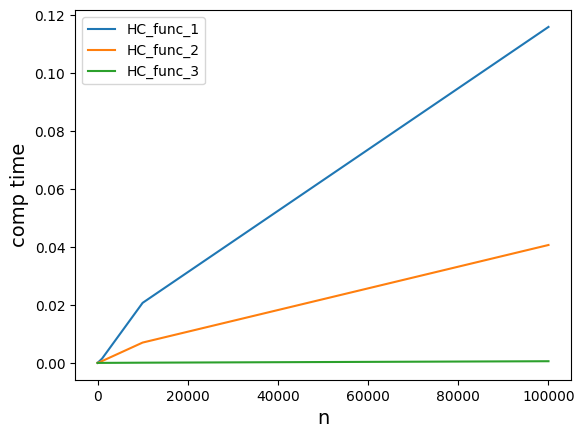

In [28]:
import matplotlib.pyplot as plt
first_func, second_func, third_func = comp_time_res()
x = np.array([1e1, 1e2, 1e3, 1e4, 1e5], dtype=int)

plt.plot(x, first_func)
plt.plot(x, second_func)
plt.plot(x, third_func)

plt.xlabel("n", fontsize=14)
plt.ylabel("comp time", fontsize=14)
plt.legend(["HC_func_1", "HC_func_2", "HC_func_3"]);

## The option with a `jit` compiler turned out to be the fastest. Let's use it to calculate $a(10^8)$:

In [29]:
n = int(1e8)
a = np.ones(n, dtype = int)

%time HC_func3(a, n)
%time HC_func3(a, n)
%time HC_func3(a, n)

CPU times: user 586 ms, sys: 4.05 ms, total: 590 ms
Wall time: 588 ms
CPU times: user 586 ms, sys: 4.75 ms, total: 590 ms
Wall time: 586 ms
CPU times: user 587 ms, sys: 2.11 ms, total: 589 ms
Wall time: 584 ms


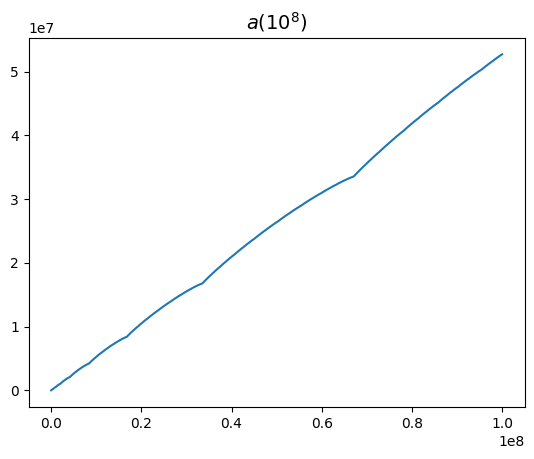

In [30]:
x = np.arange(1, n + 1, 1, dtype=int)
plt.plot(x, a);
plt.title("$a(10^8)$", fontsize=14);

## Finally we display the graph $f(n) = a(n)/n$ for $n = 1, 2, ..., 2000$

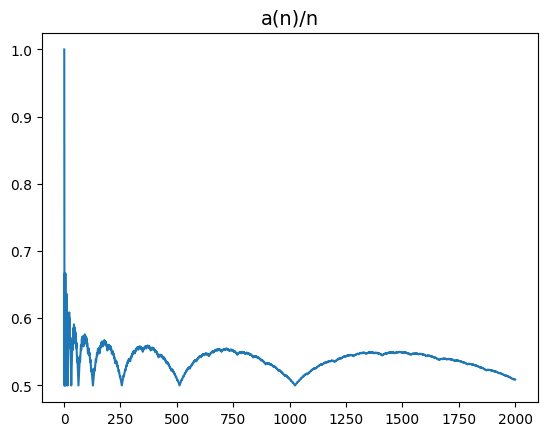

In [31]:
n = int(2000)
a = np.ones(n, dtype = int)
HC_func3(a, n)

x = np.arange(1, n + 1, 1, dtype=int)
y = a * np.array([1 / (i + 1) for i in range(n)])
plt.plot(x, y);
plt.title("a(n)/n", fontsize=14);